In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

C:\Users\bert0\AppData\Local\Temp\ipykernel_2092\2080034654.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Using the Return Rate and Annaul Volatility from "Stock_Return&Volatility" file

In [2]:
mu = 0.5898192082743212 #Annual Return Rate
Std = 0.3328222332734525 #Annaul Volatility
dt = 1/252. # 252 trading days, so using 1/252 to represent each trading day. Convert annual return into daily return

In [3]:
def Simulation_StockPrice(S0, mu, Std, dt):
    S1 = S0 * np.exp((mu - 0.5 *Std**2)*dt + Std*np.sqrt(dt)*np.random.standard_normal())
    return S1

In [4]:
def simu_df(ori_price = 10000,simu_time = 1000, trade_day = 252):
    
    pricelist=[]
    pricelist.append(ori_price)
    new_price = ori_price
    data ={}
    df = pd.DataFrame(data)

    for j in range(1,simu_time+1):
        for i in range(trade_day-1):
            new_price = Simulation_StockPrice(new_price, mu, Std, dt)
            pricelist.append(new_price)
        #print(pricelist)

        df = pd.concat([df,pd.Series(pricelist)],axis = 1)
        #print(df)
        pricelist=[]
        pricelist.append(ori_price)
        new_price = ori_price
        if j %500 ==0:
            print("No.",j,"Simulation")
    print("Finish Simulation!")
    return df

In [5]:
#df.plot()
def plotmontecarlo(df):
    print("Plot Starting")
    plt.figure(figsize = (20,16))
    plt.plot(df)
    plt.xlabel("Day")
    #plt.xticks(np.linspace(0,251,10,endpoint = True))
    plt.ylabel("Price")
    #plt.yticks(np.linspace(0,2*ori_price,21,endpoint = True))
    plt.show()

In [6]:
#df.plot()
def plotmontecarlodistribution(df):
    last_price_list = df.iloc[-1,:]
    print("Expected price: ", round(np.mean(last_price_list),2))
    print("Quantile (5%): ",np.percentile(last_price_list,5))
    print("Quantile (95%): ",np.percentile(last_price_list,95))
    plt.hist(last_price_list,bins=100)
    plt.axvline(np.percentile(last_price_list,5), color='r', linestyle='dashed', linewidth=2)
    plt.axvline(np.percentile(last_price_list,95), color='r', linestyle='dashed', linewidth=2)
    plt.show()

In [7]:
dftest = simu_df(ori_price = 500,simu_time = 10000, trade_day = 63)

No. 500 Simulation
No. 1000 Simulation
No. 1500 Simulation
No. 2000 Simulation
No. 2500 Simulation
No. 3000 Simulation
No. 3500 Simulation
No. 4000 Simulation
No. 4500 Simulation
No. 5000 Simulation
No. 5500 Simulation
No. 6000 Simulation
No. 6500 Simulation
No. 7000 Simulation
No. 7500 Simulation
No. 8000 Simulation
No. 8500 Simulation
No. 9000 Simulation
No. 9500 Simulation
No. 10000 Simulation
Finish Simulation!


Plot Starting


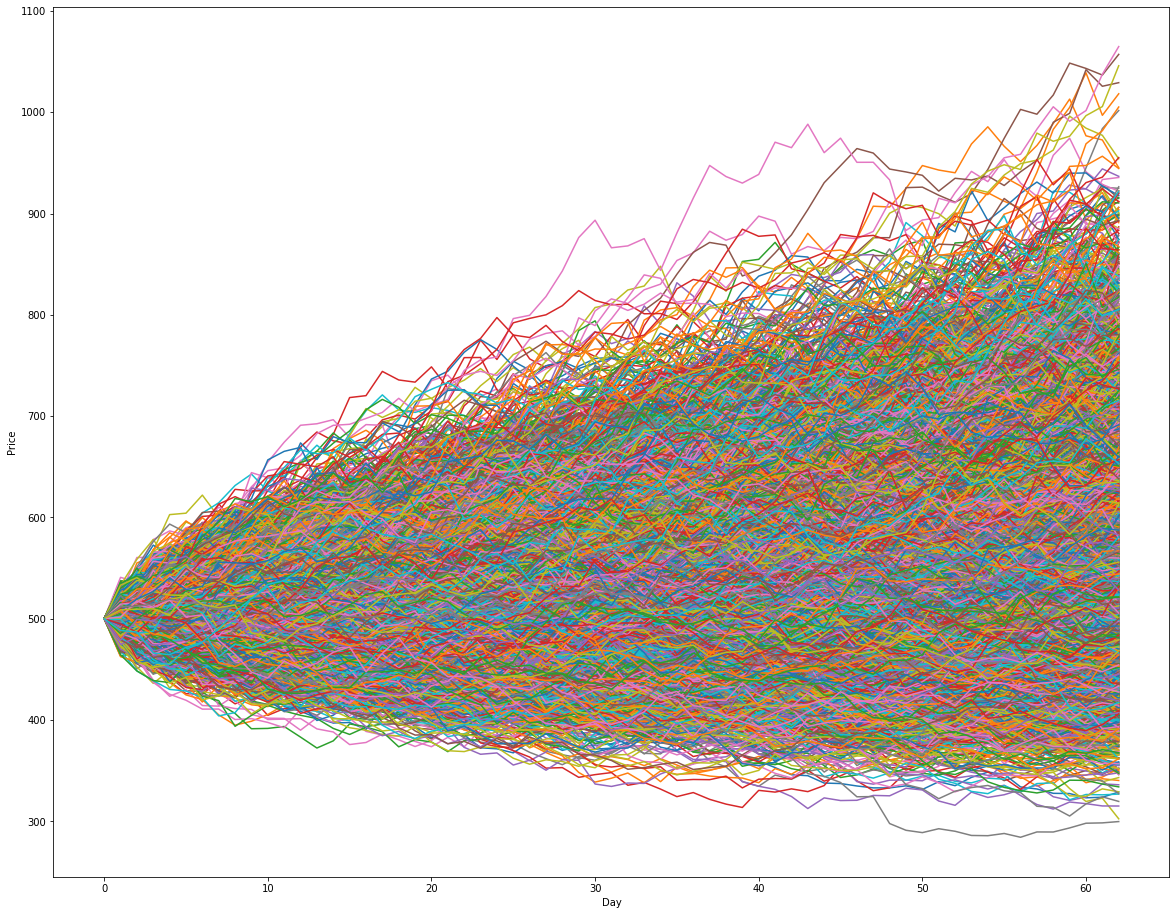

In [8]:
plotmontecarlo(dftest)

Expected price:  578.09
Quantile (5%):  433.763340192526
Quantile (95%):  744.7305039731366


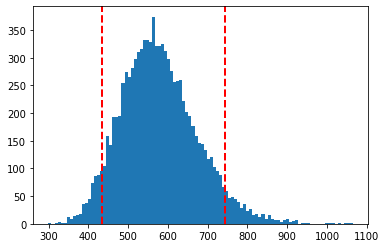

In [9]:
plotmontecarlodistribution(dftest) # 420 ~ 750